In [1]:
# NN: https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
# https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5

# we are predicting BIRTH WEIGHT (DBWT)

# Setup and imports

import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# CROP DOWN THE DATA FOR TESTING...
from numpy.random import RandomState
rng = RandomState()

train = pd.read_csv("../../data/us_births_train.csv").sample(frac=1, random_state=rng)
print(train.shape)
test = pd.read_csv("../../data/us_births_test.csv").sample(frac=1, random_state=rng)
print(test.shape)
#train.head()
#test.head()

Using TensorFlow backend.


(3041227, 16)
(760307, 16)


In [2]:
# Seperate test/train data into X and y (input and output)
X_train = train.drop('DBWT', axis=1) 
y_train = train['DBWT']
X_test = test.drop('DBWT', axis=1)
y_test = test['DBWT']

#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [3]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['MSE'])
    return model

In [4]:
# define a DEEPER model
def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['MSE'])
    return model

In [5]:
# define a WIDER model
def wider_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['MSE'])
    return model

In [6]:
# define a WIDER, DEEPER model
def larger_wider_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(20, kernel_initializer='normal', activation='relu'))
    model.add(Dense(20, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['MSE'])
    return model

In [7]:
# training the model
model = larger_wider_model()
neural_net = model.fit(X_train, y_train, epochs=10, batch_size=5, verbose=1)

Epoch 1/10
3041227/3041227 [==============================] - 499s 164us/step - loss: 380617.2036 - MSE: 380621.3125
Epoch 2/10
3041227/3041227 [==============================] - 510s 168us/step - loss: 363223.6322 - MSE: 363222.4062s - loss: 363223.7799 - MSE: 363222.531
Epoch 3/10
3041227/3041227 [==============================] - 443s 146us/step - loss: 344243.0697 - MSE: 344242.1875
Epoch 4/10
3041227/3041227 [==============================] - 536s 176us/step - loss: 343356.2694 - MSE: 343356.0625
Epoch 5/10
3041227/3041227 [==============================] - 542s 178us/step - loss: 341954.4233 - MSE: 341958.9062s - loss: 341977.1551 - MSE: 341981. - ETA: 1s - loss: 34197
Epoch 6/10
3041227/3041227 [==============================] - 619s 203us/step - loss: 340778.4038 - MSE: 340784.2500
Epoch 7/10
3041227/3041227 [==============================] - 626s 206us/step - loss: 340092.5405 - MSE: 340091.3750s - loss: 340083.4120 - MSE: 340082.
Epoch 8/10
3041227/3041227 [==================

In [8]:
# predict
y_pred = model.predict(X_test)

Mean Absolute Error: 413.71768199655133
Mean Squared Error: 337787.3223172165
Root Mean Squared Error: 581.1947370006171
R Squared: 0.1201153611437823


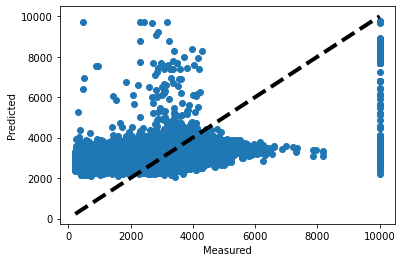

In [9]:
# get some metrics
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared:', metrics.r2_score(y_test, y_pred))

# plot predictions vs expected
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()